# pyauric features
1. Manage AURIC batch runs
2. Read data from AURIC output files

The AURIC environment is handled through `AURICManager`. It will assume that you either have an `AURIC_ROOT` environment variable or that you keep auric in `~/auric`. If this is not the case or you want to run use another dierctory as the root, pass it as an argument.

In [1]:
import pyauric
auric = pyauric.AURICManager()
# reset the parameters to a default setting
with open(auric.pathto('param.inp'),'w') as f:
    f.writelines(pyauric._param_format)

## AURIC batch run

`pyauric` can be used to set the input parameters for an AURIC batch run, which end up in the various `.inp` files. For example, here are some example parameters which produce a nightglow batch run.

In [2]:
print("AURIC input parameters:\n")
for line in auric.params.items():
    print("    ",line)

auric.runbatch();
print("\n\nLines computed in AURIC batch run:\n")
print("   ",auric.load("dayglo.ver").columns)

AURIC input parameters:

     ('DPANG', 70.16)
     ('SCALE(O3)', 1.0)
     ('NALT', 100.0)
     ('F10AVE', 79.4)
     ('SCALE(H)', 1.0)
     ('UTSEC', 45000.0)
     ('F10PRE', 76.8)
     ('SCALE(O)', 1.0)
     ('AP(1)', 9.0)
     ('AP(5)', -1.0)
     ('SCALE(N2)', 1.0)
     ('AP(6)', -1.0)
     ('AP(7)', -1.0)
     ('AP(3)', -1.0)
     ('SCALE(NO)', 1.0)
     ('ZUB', 1000.0)
     ('SCALE(O2)', 1.0)
     ('F10DAY', 79.3)
     ('SZA', 30.0)
     ('GLAT', 42.0)
     ('SCALE(Ar)', 1.0)
     ('D', 'e')
     ('SLT', 1.0)
     ('M', 'a')
     ('AP(2)', -1.0)
     ('GMLON', 1.71)
     ('GMLAT', 51.84)
     ('AP(4)', -1.0)
     ('GLON', 0.0)
     ('YYDDD', 92080.0)
     ('SCALE(He)', 1.0)
     ('SCALE(N)', 1.0)


Lines computed in AURIC batch run:

    Index(['832 A (final)', '833 A (final)', '834 A (final)',
       'Ar+e 1048 A (initial)', 'Ar+e 1066 A (initial)', 'N(2Do) hv 5200 A',
       'N(2Po) hv 3466 A', 'N+e 1135 A (initial)', 'N+e 1199 A (initial)',
       'N+e 1493 A', 'N+e 1743 A', 

### Change parameters
Suppose we meant to do a nighttime run instead. We can change the UTC to midnight like this:

In [3]:
auric.set_params({"UTSEC":0*3600})
print(auric.params['UTSEC'])

0.0


In order to compute the derived parameters, use `auric.run_geoparm`. It takes an argument to tell it whether to compute F10.7 and Ap or to leave whatever is already in `param.inp` alone. This allows the user to manually specify F10.7 or Ap.

In [4]:
print(auric.params['F10AVE'], auric.params['AP(1)'])
auric.run_geoparm(True)
print(auric.params['F10AVE'], auric.params['AP(1)'])

79.4 9.0
179.0 4.13


Running the batch script again will produce dayglow instead.

In [5]:
auric.runbatch();
print("Lines computed in AURIC batch run:")
print("   ",auric.load("niteglo.ver").columns)

Lines computed in AURIC batch run:
    Index(['O(1D) 6300 A', 'O(1D) 6364 A', 'O(1S) 2972 A', 'O(1S) 5577 A',
       'O(3P) 8446 A', 'O(3So) 1304 A (initial)', 'O(5P) 7774 A',
       'O(5So) 1356 A (initial)', 'O2(A prime) Chamberlain',
       'O2(A) Herzberg I', 'O2(b) Atmospheric (0-0)', 'O2(c) Herzberg II'],
      dtype='object')


## Reading AURIC files
AURIC's files can be loaded into a dictionary or data frame with `AURICManager.load(filename)`. Filenames should be relative to the AURIC root.

In [6]:
ni = auric.load("niteglo.int")
nv = auric.load("niteglo.ver")

Data loaded in this way will define a title and ylabel for plotting.

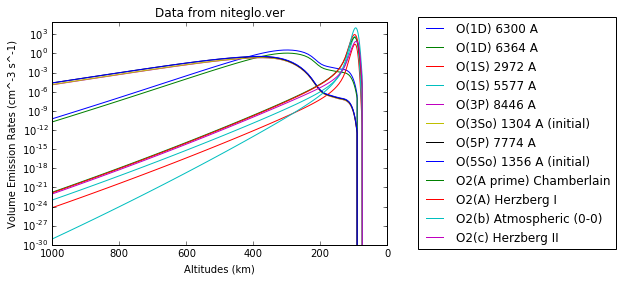

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
def outside_legend(ax):
    return ax.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))

nv.plot()
lgd = outside_legend(plt.gca())
plt.yscale('log')
plt.title(nv.title)
plt.ylabel(nv.ylabel);

We can use list comprehensions to pick out different types features to look at.

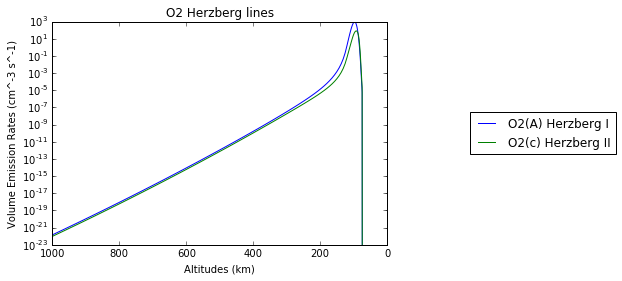

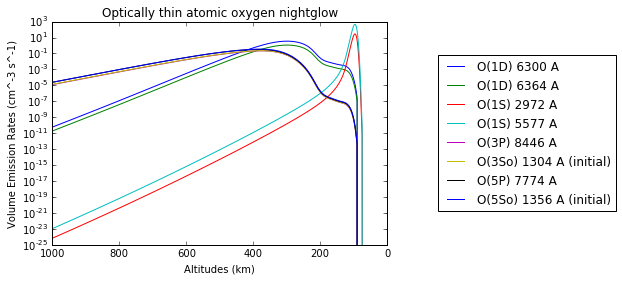

In [8]:
herzberg = [ c for c in nv.columns if "Herzberg" in c ]

nv[herzberg].plot()
plt.yscale('log')
outside_legend(plt.gca())
plt.ylabel(nv.ylabel)
plt.title("O2 Herzberg lines");

thin_O = [ c for c in nv.columns if "O2" not in c and "final" not in c ]

nv[thin_O].plot()
plt.yscale('log')
outside_legend(plt.gca())
plt.ylabel(nv.ylabel)
plt.title("Optically thin atomic oxygen nightglow");